<a href="https://colab.research.google.com/github/tomthomas/FPL-Scrape/blob/main/FPL_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import requests
import pandas as pd
import numpy as np
import json

#### Get URL

In [36]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

In [ ]:
url2 = 'https://github.com/statsbomb/open-data/blob/master/data/competitions.json'

In [ ]:
stat_dict = json.loads(url2)

JSONDecodeError: ignored

In [ ]:
r2 = requests.get(url2)

#### GET Request

In [37]:
r = requests.get(url)

In [ ]:
json2 = r.json()

#### Convert to JSON Object

In [38]:
json = r.json()

#### Look at JSON Keys

In [ ]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

#### Focus on 3 keys - elements, element_types, teams

### Create dataframes

In [39]:
elements_df           = pd.DataFrame(json['elements'])
element_types_df      = pd.DataFrame(json['element_types'])
teams_df              = pd.DataFrame(json['teams'])
events_df             = pd.DataFrame(json['events'])
element_stats_df      = pd.DataFrame(json['element_stats'])

#### Preview Head

In [ ]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,0.0,0.0,37605,0,0,-3,3,0,3,0.0,0.0,0,Mesut,0.0,1,False,Not included in Arsenal's 25-man Premier Leagu...,2020-10-20T22:30:18.118477Z,67,37605.jpg,0.0,Özil,0.5,False,None,u,1,3,0,3441,0,54554,55,0.0,0.0,Özil,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,685,278,685,278,685,278,685,278,NaN,,NaN,,NaN,
1,0.0,0.0,39476,0,0,-2,2,0,2,0.0,0.0,0,Sokratis,0.0,2,False,Left the club by mutual consent on 20/1,2020-10-21T10:30:18.546407Z,48,39476.jpg,0.0,Papastathopoulos,0.1,False,None,u,1,3,0,10266,0,19094,9,0.0,0.0,Sokratis,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,648,232,640,233,632,230,651,232,NaN,,NaN,,NaN,
2,100.0,100.0,41270,0,0,-1,1,0,2,3.0,3.5,2,David,3.0,3,False,,2021-02-02T20:30:22.388696Z,54,41270.jpg,2.2,Luiz Moreira Marinho,0.8,False,None,a,1,3,37,62166,1409,108690,2660,0.6,6.9,David Luiz,1164,1,0,3,16,0,0,0,1,1,0,0,192,206.8,43.2,111.0,35.8,231,93,319,103,221,60,283,95,NaN,,4.0,,NaN,
3,100.0,100.0,54694,1,-1,-6,6,2,3,7.8,8.3,8,Pierre-Emerick,7.8,4,False,,2021-01-23T16:00:22.555453Z,114,54694.jpg,4.5,Aubameyang,8.0,False,None,a,1,3,104,761889,57288,3333726,16724,0.7,9.1,Aubameyang,1851,9,1,7,20,1,0,0,2,0,0,10,288,408.4,260.9,723.0,139.0,101,33,98,68,22,13,36,24,NaN,,NaN,,1.0,
4,100.0,100.0,58822,0,0,-4,4,0,2,0.8,1.3,0,Cédric,0.8,5,False,,2020-09-23T09:00:14.881983Z,46,58822.jpg,3.2,Soares,0.3,False,None,a,1,3,26,26715,203,49795,1264,0.2,5.7,Cédric,609,0,1,2,7,0,0,0,1,0,0,3,111,100.6,109.0,45.0,25.5,329,128,217,54,329,117,331,115,NaN,,5.0,,NaN,


In [40]:
element_types_df.head()

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],79
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],239
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],278
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],89


In [ ]:
teams_df.head()

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1190,1210,1170,1210,1190,1200,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1150,1150,1150,1150,1180,1210,2
2,36,0,None,3,0,Brighton,0,0,0,BHA,3,None,False,0,1120,1100,1150,1180,1090,1100,131
3,90,0,None,4,0,Burnley,0,0,0,BUR,3,None,False,0,1070,1080,1120,1190,1010,1030,43
4,8,0,None,5,0,Chelsea,0,0,0,CHE,4,None,False,0,1250,1300,1240,1280,1270,1310,4


In [ ]:
events_df.head()

,id,name,deadline_time,average_entry_score,finished,data_checked,highest_scoring_entry,deadline_time_epoch,deadline_time_game_offset,highest_score,is_previous,is_current,is_next,chip_plays,most_selected,most_transferred_in,top_element,top_element_info,transfers_made,most_captained,most_vice_captained
0,1,Gameweek 1,2020-09-12T10:00:00Z,50,True,True,4761681.0,1599904800,0,142.0,False,False,False,"[{'chip_name': 'bboost', 'num_played': 112843}...",259.0,12.0,254.0,"{'id': 254, 'points': 20}",0,4.0,4.0
1,2,Gameweek 2,2020-09-19T10:00:00Z,59,True,True,6234344.0,1600509600,0,165.0,False,False,False,"[{'chip_name': 'bboost', 'num_played': 94615},...",259.0,302.0,390.0,"{'id': 390, 'points': 24}",14637421,4.0,254.0
2,3,Gameweek 3,2020-09-26T10:00:00Z,43,True,True,6223553.0,1601114400,0,119.0,False,False,False,"[{'chip_name': 'bboost', 'num_played': 86797},...",259.0,164.0,224.0,"{'id': 224, 'points': 17}",20387878,272.0,254.0
3,4,Gameweek 4,2020-10-03T10:00:00Z,48,True,True,6563000.0,1601719200,0,160.0,False,False,False,"[{'chip_name': 'bboost', 'num_played': 82267},...",272.0,164.0,37.0,"{'id': 37, 'points': 24}",14570655,254.0,272.0
4,5,Gameweek 5,2020-10-17T10:00:00Z,60,True,True,7124486.0,1602928800,0,136.0,False,False,False,"[{'chip_name': 'bboost', 'num_played': 80554},...",164.0,390.0,117.0,"{'id': 117, 'points': 16}",18391649,390.0,254.0


In [ ]:
element_stats_df.columns

Index(['label', 'name'], dtype='object')

#### Preview Columns

In [ ]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [ ]:
element_types_df.columns

In [ ]:
events_df.columns

In [ ]:
teams_df.columns

#### Filter smaller dataframe

In [42]:
filter_elements_df = elements_df [['second_name','first_name','team','element_type','chance_of_playing_this_round','ict_index','value_form','points_per_game','selected_by_percent','now_cost','bps','value_season','total_points','form','minutes']]

In [43]:
filter_elements_df.head()

,second_name,first_name,team,element_type,chance_of_playing_this_round,ict_index,value_form,points_per_game,selected_by_percent,now_cost,bps,value_season,total_points,form,minutes
0,Özil,Mesut,1,3,0.0,0.0,0.0,0.0,0.5,67,0,0.0,0,0.0,0
1,Papastathopoulos,Sokratis,1,2,0.0,0.0,0.0,0.0,0.1,48,0,0.0,0,0.0,0
2,Luiz Moreira Marinho,David,1,2,100.0,35.8,0.6,2.2,0.8,54,192,6.9,37,3.0,1164
3,Aubameyang,Pierre-Emerick,1,3,100.0,139.0,0.7,4.5,8.0,114,288,9.1,104,7.8,1851
4,Soares,Cédric,1,2,100.0,25.5,0.2,3.2,0.3,46,111,5.7,26,0.8,609


In [44]:
filter_elements_df['name'] = filter_elements_df[['first_name','second_name']].apply(lambda x: ' '.join(x), axis=1)
filter_elements_df.pop('first_name')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0               Mesut
1            Sokratis
2               David
3      Pierre-Emerick
4              Cédric
            ...      
680           Andreas
681           Patrick
682             Nigel
683      Willian José
684              Hugo
Name: first_name, Length: 685, dtype: object

In [45]:
filter_elements_df.pop('second_name')

0                      Özil
1          Papastathopoulos
2      Luiz Moreira Marinho
3                Aubameyang
4                    Soares
               ...         
680             Söndergaard
681                 Cutrone
682                 Lonwijk
683                Da Silva
684                   Bueno
Name: second_name, Length: 685, dtype: object

## Dataframe Sorting

### Map()

#### Similar to V-lookup

#### Map filter_elements_df to element_type_df (NOT element_type under elements_df)

In [46]:
filter_elements_df['position'] = filter_elements_df.element_type.map(element_types_df.set_index('id').singular_name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
filter_elements_df.head()

,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,name,position
0,Arsenal,3,0.5,67,0,3441,0.0,0,0.0,Mesut Özil,Midfielder
1,Arsenal,2,0.1,48,0,10266,0.0,0,0.0,Sokratis Papastathopoulos,Defender
2,Arsenal,2,0.8,54,1164,62166,6.9,37,3.0,David Luiz Moreira Marinho,Defender
3,Arsenal,3,8.0,114,1851,761889,9.1,104,7.8,Pierre-Emerick Aubameyang,Midfielder
4,Arsenal,2,0.3,46,609,26715,5.7,26,0.8,Cédric Soares,Defender


#### We^ organized Name by position i think

In [47]:
filter_elements_df['team'] = filter_elements_df.team.map(teams_df.set_index('id').name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Adding Team name

In [56]:
filter_elements_df.head()

,team,element_type,chance_of_playing_this_round,ict_index,value_form,points_per_game,selected_by_percent,now_cost,bps,value_season,total_points,form,minutes,name,position,realvalue
2,Arsenal,2,100.0,35.8,0.6,2.2,0.8,54.0,192.0,6.9,37.0,3.0,1164,David Luiz Moreira Marinho,Defender,185.000000
3,Arsenal,3,100.0,139.0,0.7,4.5,8.0,114.0,288.0,9.1,104.0,7.8,1851,Pierre-Emerick Aubameyang,Midfielder,1158.857143
4,Arsenal,2,100.0,25.5,0.2,3.2,0.3,46.0,111.0,5.7,26.0,0.8,609,Cédric Soares,Defender,104.000000
5,Arsenal,4,100.0,126.3,0.3,3.9,4.0,81.0,314.0,11.1,90.0,2.5,1440,Alexandre Lacazette,Forward,750.000000
7,Arsenal,1,100.0,52.9,0.6,3.8,6.6,50.0,475.0,19.8,99.0,2.8,2321,Bernd Leno,Goalkeeper,462.000000


#### Sort by value_season

In [ ]:
filter_elements_df.pop('value_season')

0      0.0
1      0.0
2      6.9
3      9.1
4      5.7
      ... 
680    0.0
681    0.3
682    0.0
683    2.6
684    0.0
Name: value_season, Length: 685, dtype: object

Convert to Float

In [ ]:
filter_elements_df['chance_of_playing_this_round'] = filter_elements_df.chance_of_playing_this_round.astype(float)
filter_elements_df['ict_index'] = filter_elements_df.ict_index.astype(float)
filter_elements_df['value_form'] = filter_elements_df.value_form.astype(float)
filter_elements_df['points_per_game'] = filter_elements_df.points_per_game.astype(float)
filter_elements_df['selected_by_percent'] = filter_elements_df.selected_by_percent.astype(float)
filter_elements_df['now_cost'] = filter_elements_df.now_cost.astype(float)
filter_elements_df['bps'] = filter_elements_df.bps.astype(float)

In [ ]:
filter_elements_df['minutes'] = elements_df['minutes']

Add RealValue

In [54]:
filter_elements_df['realvalue'] = (filter_elements_df['form'] / filter_elements_df['value_form'])*filter_elements_df['total_points']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Helps us see the top value picks of the year

#### value_season has string values

#### To avoid data conflict, we need to create a new column called value. 
#### astype() helps convert values to float

In [48]:
filter_elements_df['value_season'] = filter_elements_df.value_season.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


sort_values() helps you sort data

#### Default is ascending direction from low to high. For descending, set to False.

In [ ]:
filter_elements_df.sort_values('value',ascending=False).head(10)

,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,name,position,value
354,Man City,3,16.8,58,1035,1408334,13.8,80.0,8.8,Ilkay Gündogan,Midfielder,8.8
356,Man City,2,20.3,52,990,1731706,14.8,77.0,8.2,John Stones,Defender,8.2
22,Arsenal,3,11.8,54,1503,1207402,15.0,81.0,8.2,Bukayo Saka,Midfielder,8.2
269,Leicester,3,2.9,64,1743,357151,13.1,84.0,8.0,Youri Tielemans,Midfielder,8.0
519,Spurs,4,35.4,112,1654,4476706,12.8,143.0,7.5,Harry Kane,Forward,7.5
597,West Ham,3,18.4,53,1800,1978115,18.1,96.0,7.5,Tomas Soucek,Midfielder,7.5
272,Leicester,3,13.1,72,1201,1595195,11.7,84.0,7.2,James Maddison,Midfielder,7.2
568,West Brom,3,1.1,56,1182,264214,10.7,60.0,7.0,Matheus Pereira,Midfielder,7.0
5,Arsenal,4,8.3,84,1121,1018177,8.7,73.0,6.8,Alexandre Lacazette,Forward,6.8
360,Man City,2,19.3,60,1279,1883395,14.3,86.0,6.6,João Pedro Cavaco Cancelo,Defender,6.6


#### Value season = total points / now cost

### Using Pivot_table()

#### Using pivot on column position -> value by position

In [ ]:
pivot = filter_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

In [ ]:
pivot.sort_values('value',ascending = False)

,position,value
0,Defender,4.773128
3,Midfielder,4.528846
1,Forward,4.172619
2,Goalkeeper,3.912162


#### This result maybe skewed by players who play less minutes

#### Let's remove 0 minute players

### Using .loc[ ]

#### .loc helps you locate specifc rows/columns

In [55]:
filter_elements_df = filter_elements_df.loc[filter_elements_df.minutes > 500 ]

In [ ]:
pivot = filter_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

In [ ]:
pivot.sort_values('value',ascending = False)

,position,value
2,Goalkeeper,8.772727
0,Defender,6.337427
3,Midfielder,5.946970
1,Forward,5.476562


#### Which Teams are providing the most value this year?

In [ ]:
team_pivot = filter_elements_df.pivot_table(index = 'team', values ='value', aggfunc = np.mean).reset_index()

In [ ]:
team_pivot.sort_values('value', ascending = False)

,team,value
1,Aston Villa,8.957895
18,West Ham,7.927273
8,Leeds,7.676190
15,Southampton,7.160870
11,Man City,6.956522
3,Burnley,6.680952
5,Crystal Palace,6.619048
16,Spurs,6.463636
4,Chelsea,6.458333
0,Arsenal,6.300000


####

### Using .hist()

#### Histogram distribution of each value by position

#### Filter more dataframes

In [ ]:
fwd_df = filter_elements_df.loc[filter_elements_df.position == 'Forward']
mid_df = filter_elements_df.loc[filter_elements_df.position == 'Midfielder']
def_df = filter_elements_df.loc[filter_elements_df.position == 'Defender']
gk_df = filter_elements_df.loc[filter_elements_df.position == 'Goalkeeper']

In [50]:
filter_elements_df['form'] = filter_elements_df.form.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
filter_elements_df['total_points'] = filter_elements_df.total_points.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
filter_elements_df['value'] = filter_elements_df.value.astype(float)

In [ ]:
mid_filter_df = mid_df.loc[mid_df['team'].isin(['Sheffield Utd','Newcastle','Burnley','Man Utd','Wolves','Man City','Brighton','Spurs','Fulham','Arsenal','Crystal Palace'])] 
def_filter_df = def_df.loc[def_df['team'].isin(['Sheffield Utd','Newcastle','Burnley','Man Utd','Wolves','Man City','Brighton','Spurs','Fulham','Arsenal','Crystal Palace'])] 
gk_filter_df = gk_df.loc[gk_df['team'].isin(['Sheffield Utd','Newcastle','Burnley','Man Utd','Wolves','Man City','Brighton','Spurs','Fulham','Arsenal','Crystal Palace'])] 

In [ ]:
cheap_filter_df = filter_elements_df.loc[filter_elements_df['team'].isin(['Sheffield Utd','Newcastle','Burnley','Man Utd','Wolves','Man City','Brighton','Spurs','Fulham','Arsenal','Crystal Palace'])] 

In [ ]:
fwd_filter_df = fwd_df.loc[fwd_df['team'].isin(['Sheffield Utd','Newcastle','Burnley','Man Utd','Wolves','Man City','Brighton','Spurs','Fulham','Arsenal','Crystal Palace'])] 

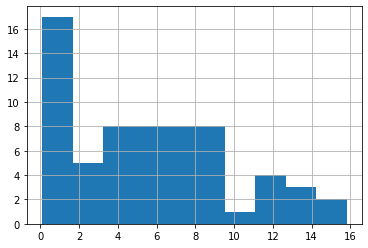

In [ ]:
fwd_df.value.hist()

In [ ]:
fwd_df.sort_values('form', ascending = False).head(10) 

,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,name,position,value
519,Spurs,4,35.4,112,1654,4476706,12.8,143.0,7.5,Harry Kane,Forward,7.5
5,Arsenal,4,8.3,84,1121,1018177,8.7,73.0,6.8,Alexandre Lacazette,Forward,6.8
586,West Ham,4,16.2,65,825,1412495,8.2,53.0,6.0,Michail Antonio,Forward,6.0
79,Brighton,4,3.1,61,1308,815365,11.6,71.0,4.8,Neal Maupay,Forward,4.8
63,Aston Villa,4,15.7,62,1620,2225593,13.4,83.0,4.0,Ollie Watkins,Forward,4.0
486,Southampton,4,9.0,84,1128,1465564,8.9,75.0,3.7,Danny Ings,Forward,3.7
546,West Brom,4,1.0,54,1066,202008,9.1,49.0,3.5,Callum Robinson,Forward,3.5
114,Burnley,4,1.6,62,1619,258474,9.8,61.0,3.5,Chris Wood,Forward,3.5
326,Liverpool,4,6.3,94,1596,716791,8.5,80.0,3.0,Roberto Firmino,Forward,3.0
454,Sheffield Utd,4,2.1,52,1180,315166,11.2,58.0,3.0,David McGoldrick,Forward,3.0


In [ ]:
fwd_filter_df['form'] = fwd_filter_df.form.astype(float)

In [ ]:
fwd_filter_df = fwd_filter_df.loc[fwd_filter_df.realvalue < 50 ]
fwd_filter_df = fwd_filter_df.loc[fwd_filter_df.minutes > 500 ]

In [ ]:
fwd_filter_df.pop('realvalue1')


In [ ]:
fwd_df['realvalue'] = (fwd_df['form'] / fwd_df['value'])*fwd_df['total_points']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
mid_df['realvalue'] = (mid_df['form'] / mid_df['value'])*mid_df['total_points']
def_df['realvalue'] = (def_df['form'] / def_df['value'])*def_df['total_points']
gk_df['realvalue'] = (gk_df['form'] / gk_df['value'])*gk_df['total_points']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
mid_filter_df = mid_filter_df.loc[mid_filter_df.minutes > 500 ]
def_filter_df = def_filter_df.loc[def_filter_df.minutes > 500 ]
gk_filter_df = gk_filter_df.loc[gk_filter_df.minutes > 500 ]

In [ ]:
fwd_df.sort_values('realvalue', ascending = False).head(15) 

,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,name,position,value,realvalue
519,Spurs,4,35.4,112,1654,4476706,12.8,143.0,7.5,Harry Kane,Forward,7.5,143.0
265,Leicester,4,15.3,100,1476,3381845,11.6,116.0,2.2,Jamie Vardy,Forward,2.2,116.0
295,Leeds,4,47.3,66,1605,5459688,15.8,104.0,1.7,Patrick Bamford,Forward,1.7,104.0
208,Everton,4,35.7,76,1493,5914912,12.8,97.0,1.3,Dominic Calvert-Lewin,Forward,1.3,97.0
447,Newcastle,4,18.0,66,1597,3307889,14.7,97.0,2.6,Callum Wilson,Forward,2.6,97.0
63,Aston Villa,4,15.7,62,1620,2225593,13.4,83.0,4.0,Ollie Watkins,Forward,4.0,83.0
326,Liverpool,4,6.3,94,1596,716791,8.5,80.0,3.0,Roberto Firmino,Forward,3.0,80.0
486,Southampton,4,9.0,84,1128,1465564,8.9,75.0,3.7,Danny Ings,Forward,3.7,75.0
496,Southampton,4,5.3,59,1507,1191412,12.5,74.0,1.3,Che Adams,Forward,1.3,74.0
5,Arsenal,4,8.3,84,1121,1018177,8.7,73.0,6.8,Alexandre Lacazette,Forward,6.8,73.0


In [ ]:
mid_df.sort_values('realvalue', ascending = False).head(15) 

,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,name,position,value,realvalue
395,Man Utd,3,56.2,114,1655,4819996,12.5,142.0,4.4,Bruno Miguel Borges Fernandes,Midfielder,4.4,142.0
521,Spurs,3,59.5,98,1616,6230651,14.4,141.0,5.5,Heung-Min Son,Midfielder,5.5,141.0
331,Liverpool,3,38.0,125,1561,3984970,10.5,131.0,2.0,Mohamed Salah,Midfielder,2.0,131.0
45,Aston Villa,3,37.7,77,1617,4788568,14.7,113.0,5.8,Jack Grealish,Midfielder,5.8,113.0
328,Liverpool,3,8.3,118,1599,1485243,8.7,103.0,5.5,Sadio Mané,Midfielder,5.5,103.0
178,Crystal Palace,3,14.8,72,1520,3799705,13.8,99.0,3.2,Wilfried Zaha,Midfielder,3.2,99.0
359,Man City,3,11.9,116,1438,1669019,8.4,97.0,5.2,Raheem Sterling,Midfielder,5.2,97.0
597,West Ham,3,18.4,53,1800,1978115,18.1,96.0,7.5,Tomas Soucek,Midfielder,7.5,96.0
355,Man City,3,12.2,118,1405,4150352,8.1,95.0,5.4,Kevin De Bruyne,Midfielder,5.4,95.0
399,Man Utd,3,11.3,96,1627,1965494,9.9,95.0,2.6,Marcus Rashford,Midfielder,2.6,95.0


In [ ]:
def_df.sort_values('realvalue', ascending = False).head(15) 

In [ ]:
gk_df.sort_values('realvalue', ascending = False).head(15) 

In [ ]:
player_stack = pd.concat([fwd_df, mid_df, def_df,gk_df], axis=0)

In [ ]:
player_stack.sort_values('form',ascending = False).head(20)

,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,form,name,position,value,realvalue
354,Man City,3,16.8,58,1035,1408334,13.8,80.0,8.8,Ilkay Gündogan,Midfielder,8.8,80.0
22,Arsenal,3,11.8,54,1503,1207402,15.0,81.0,8.2,Bukayo Saka,Midfielder,8.2,81.0
356,Man City,2,20.3,52,990,1731706,14.8,77.0,8.2,John Stones,Defender,8.2,77.0
269,Leicester,3,2.9,64,1743,357151,13.1,84.0,8.0,Youri Tielemans,Midfielder,8.0,84.0
519,Spurs,4,35.4,112,1654,4476706,12.8,143.0,7.5,Harry Kane,Forward,7.5,143.0
597,West Ham,3,18.4,53,1800,1978115,18.1,96.0,7.5,Tomas Soucek,Midfielder,7.5,96.0
272,Leicester,3,13.1,72,1201,1595195,11.7,84.0,7.2,James Maddison,Midfielder,7.2,84.0
568,West Brom,3,1.1,56,1182,264214,10.7,60.0,7.0,Matheus Pereira,Midfielder,7.0,60.0
5,Arsenal,4,8.3,84,1121,1018177,8.7,73.0,6.8,Alexandre Lacazette,Forward,6.8,73.0
360,Man City,2,19.3,60,1279,1883395,14.3,86.0,6.6,João Pedro Cavaco Cancelo,Defender,6.6,86.0


In [ ]:
def_df.value.hist()

In [ ]:
def_df.sort_values('value',ascending = False).head(10)

In [ ]:
mid_df.sort_values('value',ascending = False).head(10)

In [ ]:
cheap_df = filter_elements_df.loc[filter_elements_df.position != ('Defender' or 'Goalkeeper')]

In [ ]:
cheap_df = cheap_df[(cheap_df['position'] = 'Midfielder','Forward')

In [ ]:
cheap_df.sort_values('now_cost',ascending = True).head(10)

In [ ]:
filter_elements_df.sort_values('now_cost',ascending = True).head(10)

NameError: ignored

### Export to Excel

In [ ]:
from google.colab import files
filter_elements_df.to_csv('fpl_data.csv') 
files.download('fpl_data.csv')




### Download Player History

#### View entire DataFrame

In [ ]:
pd.options.display.max_columns = None

r

### JSON object holds all data together

### Build and Test for a loop

In [ ]:
url = f'https://fantasy.premierleague.com/api/element-summary/{element_id}/'

In [ ]:
for x in elements_df.index[:10] :
    element_id = elements_df.id[x]  #loop thru first 5 elements
    element_name = elements_df.first_name[x] 
    print(x)
    print(element_id)
    print(element_name)

In [ ]:
elements_df.first_name[0]

### F-String Formatting

#### Without

In [ ]:
your_name = "David"
print("Hi, my name is {your_name}")

### With 

In [ ]:
print(f"Hi, my name is {your_name}")